In [2]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Step 1: Import the dataset 
def load_and_explore_data(file_path):
    """Load dataset and display basic information"""
    print("=" * 50)
    print("STEP 1: LOADING AND EXPLORING DATASET")
    print("=" * 50)
    
    # Load the dataset
    df = pd.read_csv(file_path)
    
    print(f"Dataset Shape: {df.shape}")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print("\n" + "=" * 30)
    print("DATASET INFO:")
    print("=" * 30)
    print(df.info())
    
    print("\n" + "=" * 30)
    print("FIRST 5 ROWS:")
    print("=" * 30)
    print(df.head())
    
    print("\n" + "=" * 30)
    print("DATASET DESCRIPTION:")
    print("=" * 30)
    print(df.describe())
    
    print("\n" + "=" * 30)
    print("NULL VALUES COUNT:")
    print("=" * 30)
    null_counts = df.isnull().sum()
    print(null_counts[null_counts > 0])
    
    print("\n" + "=" * 30)
    print("DATA TYPES:")
    print("=" * 30)
    print(df.dtypes)
    
    return df

In [4]:
# Step 2: Handle missing values
def handle_missing_values(df):
    """Handle missing values using mean/median/mode imputation"""
    print("\n" + "=" * 50)
    print("STEP 2: HANDLING MISSING VALUES")
    print("=" * 50)
    
    df_processed = df.copy()
    
    # Check for missing values
    missing_before = df_processed.isnull().sum()
    print("Missing values before handling:")
    print(missing_before[missing_before > 0])
    
    # Handle Age 
    if 'Age' in df_processed.columns and df_processed['Age'].isnull().sum() > 0:
        age_median = df_processed['Age'].median()
        df_processed['Age'].fillna(age_median, inplace=True)
        print(f"\nAge: Filled {missing_before['Age']} missing values with median: {age_median:.2f}")
    
    # Handle Embarked 
    if 'Embarked' in df_processed.columns and df_processed['Embarked'].isnull().sum() > 0:
        embarked_mode = df_processed['Embarked'].mode()[0]
        df_processed['Embarked'].fillna(embarked_mode, inplace=True)
        print(f"Embarked: Filled {missing_before['Embarked']} missing values with mode: {embarked_mode}")
    
    # Handle Cabin 
    if 'Cabin' in df_processed.columns:
        df_processed['Cabin_Missing'] = df_processed['Cabin'].isnull().astype(int)
        df_processed['Cabin'].fillna('Unknown', inplace=True)
        print(f"Cabin: Created indicator for missing values and filled with 'Unknown'")
    
    # Handle Fare 
    if 'Fare' in df_processed.columns and df_processed['Fare'].isnull().sum() > 0:
        fare_median = df_processed['Fare'].median()
        df_processed['Fare'].fillna(fare_median, inplace=True)
        print(f"Fare: Filled {missing_before['Fare']} missing values with median: {fare_median:.2f}")
    
    # Verify no missing values remain
    missing_after = df_processed.isnull().sum()
    print(f"\nMissing values after handling:")
    if missing_after.sum() == 0:
        print("✓ No missing values remaining!")
    else:
        print(missing_after[missing_after > 0])
    
    return df_processed

In [6]:
# Step 3: Convert categorical features to numerical using encoding
def encode_categorical_features(df):
    """Convert categorical features to numerical using various encoding techniques"""
    print("\n" + "=" * 50)
    print("STEP 3: ENCODING CATEGORICAL FEATURES")
    print("=" * 50)
    
    df_encoded = df.copy()
    
    # Identify categorical columns
    categorical_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()
    print(f"Categorical columns found: {categorical_cols}")
    
    # Sex: Binary encoding (0 for female, 1 for male)
    if 'Sex' in categorical_cols:
        df_encoded['Sex_Encoded'] = df_encoded['Sex'].map({'female': 0, 'male': 1})
        print(f"Sex: Encoded as binary (female=0, male=1)")
    
    # Embarked: One-hot encoding
    if 'Embarked' in categorical_cols:
        embarked_dummies = pd.get_dummies(df_encoded['Embarked'], prefix='Embarked')
        df_encoded = pd.concat([df_encoded, embarked_dummies], axis=1)
        print(f"Embarked: One-hot encoded into {embarked_dummies.columns.tolist()}")
    
    # Name: Extract titles and encode
    if 'Name' in categorical_cols:
        df_encoded['Title'] = df_encoded['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
        # Group rare titles
        title_mapping = {
            'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4,
            'Dr': 5, 'Rev': 6, 'Col': 7, 'Major': 7, 'Mlle': 2,
            'Countess': 8, 'Ms': 2, 'Lady': 8, 'Jonkheer': 8,
            'Don': 8, 'Dona': 8, 'Mme': 3, 'Capt': 7, 'Sir': 8
        }
        df_encoded['Title_Encoded'] = df_encoded['Title'].map(title_mapping).fillna(0)
        print("Name: Extracted and encoded titles")
    
    # Ticket: Create indicator for ticket prefixes
    if 'Ticket' in categorical_cols:
        df_encoded['Ticket_Prefix'] = df_encoded['Ticket'].str.extract('([A-Za-z]+)', expand=False)
        df_encoded['Ticket_Prefix'] = df_encoded['Ticket_Prefix'].fillna('None')
        df_encoded['Has_Ticket_Prefix'] = (df_encoded['Ticket_Prefix'] != 'None').astype(int)
        print("Ticket: Created ticket prefix indicators")
    
    # Cabin: Extract deck information
    if 'Cabin' in categorical_cols:
        df_encoded['Deck'] = df_encoded['Cabin'].str.extract('([A-Za-z])', expand=False)
        df_encoded['Deck'] = df_encoded['Deck'].fillna('Unknown')
        # Encode deck
        deck_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8, 'Unknown': 0}
        df_encoded['Deck_Encoded'] = df_encoded['Deck'].map(deck_mapping)
        print("Cabin: Extracted and encoded deck information")
    
    print(f"\nNew encoded features added: {len(df_encoded.columns) - len(df.columns)} features")
    
    return df_encoded

In [7]:
# Step 4: Normalize/standardize numerical features
def normalize_features(df):
    """Normalize/standardize numerical features"""
    print("\n" + "=" * 50)
    print("STEP 4: NORMALIZING/STANDARDIZING FEATURES")
    print("=" * 50)
    
    df_normalized = df.copy()
    
    # Identify numerical columns to normalize
    numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
    numerical_cols = [col for col in numerical_cols if col in df_normalized.columns]
    
    print(f"Numerical columns to normalize: {numerical_cols}")
    
    # Create scaler
    scaler = StandardScaler()
    
    # Store original values for comparison
    original_stats = {}
    for col in numerical_cols:
        original_stats[col] = {
            'mean': df_normalized[col].mean(),
            'std': df_normalized[col].std(),
            'min': df_normalized[col].min(),
            'max': df_normalized[col].max()
        }
    
    # Normalize the features
    df_normalized[numerical_cols] = scaler.fit_transform(df_normalized[numerical_cols])
    
    print("\nNormalization Results:")
    print("-" * 40)
    for col in numerical_cols:
        print(f"{col}:")
        print(f"  Original - Mean: {original_stats[col]['mean']:.2f}, Std: {original_stats[col]['std']:.2f}")
        print(f"  Original - Min: {original_stats[col]['min']:.2f}, Max: {original_stats[col]['max']:.2f}")
        print(f"  Normalized - Mean: {df_normalized[col].mean():.2f}, Std: {df_normalized[col].std():.2f}")
        print(f"  Normalized - Min: {df_normalized[col].min():.2f}, Max: {df_normalized[col].max():.2f}")
        print()
    
    return df_normalized, scaler


In [8]:
# Step 5: Visualize and remove outliers
def visualize_and_remove_outliers(df):
    """Visualize outliers using boxplots and remove them"""
    print("\n" + "=" * 50)
    print("STEP 5: VISUALIZING AND REMOVING OUTLIERS")
    print("=" * 50)
    
    df_cleaned = df.copy()
    
    # Numerical columns to check for outliers (before normalization)
    original_numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
    
    # First, let's work with original data for outlier detection
    df_original = df.copy()
    
    # Create figure for boxplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Boxplots for Outlier Detection (Before Removal)', fontsize=16)
    
    outlier_info = {}
    
    for i, col in enumerate(original_numerical_cols):
        if col in df_original.columns:
            ax = axes[i//2, i%2]
            
            # Create boxplot
            bp = ax.boxplot(df_original[col].dropna(), patch_artist=True)
            ax.set_title(f'{col} - Boxplot')
            ax.set_ylabel(col)
            
            # Calculate IQR and outlier bounds
            Q1 = df_original[col].quantile(0.25)
            Q3 = df_original[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Count outliers
            outliers = df_original[(df_original[col] < lower_bound) | (df_original[col] > upper_bound)][col]
            outlier_info[col] = {
                'count': len(outliers),
                'lower_bound': lower_bound,
                'upper_bound': upper_bound,
                'outlier_values': outliers.tolist()[:10]  # Show first 10 outliers
            }
            
            # Add outlier information to plot
            ax.text(0.02, 0.98, f'Outliers: {len(outliers)}', transform=ax.transAxes, 
                   verticalalignment='top', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    # Print outlier information
    print("Outlier Analysis:")
    print("-" * 40)
    total_outliers_before = 0
    for col, info in outlier_info.items():
        print(f"{col}:")
        print(f"  Outliers found: {info['count']}")
        print(f"  Lower bound: {info['lower_bound']:.2f}")
        print(f"  Upper bound: {info['upper_bound']:.2f}")
        if info['outlier_values']:
            print(f"  Sample outlier values: {info['outlier_values']}")
        total_outliers_before += info['count']
        print()
    
    # Remove outliers (using IQR method)
    print(f"Total outlier data points before removal: {total_outliers_before}")
    
    rows_before = len(df_cleaned)
    
    # Remove outliers for each numerical column
    for col in original_numerical_cols:
        if col in df_cleaned.columns:
            Q1 = df_original[col].quantile(0.25)
            Q3 = df_original[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Keep only rows within bounds
            df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    
    rows_after = len(df_cleaned)
    print(f"Rows before outlier removal: {rows_before}")
    print(f"Rows after outlier removal: {rows_after}")
    print(f"Rows removed: {rows_before - rows_after} ({((rows_before - rows_after)/rows_before)*100:.1f}%)")
    
    # Create boxplots after outlier removal
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Boxplots After Outlier Removal', fontsize=16)
    
    for i, col in enumerate(original_numerical_cols):
        if col in df_cleaned.columns:
            ax = axes[i//2, i%2]
            bp = ax.boxplot(df_cleaned[col].dropna(), patch_artist=True)
            ax.set_title(f'{col} - After Outlier Removal')
            ax.set_ylabel(col)
    
    plt.tight_layout()
    plt.show()
    
    return df_cleaned


In [9]:
# Main execution

def preprocess_titanic_data(file_path):
    
    print("\nTITANIC DATASET PREPROCESSING PIPELINE")
    
    
    # Step 1: Load and explore data
    df = load_and_explore_data(file_path)
    
    # Step 2: Handle missing values
    df = handle_missing_values(df)
    
    # Step 3: Encode categorical features
    df = encode_categorical_features(df)
    
    # Step 5: Remove outliers (before normalization to see actual values)
    df = visualize_and_remove_outliers(df)
    
    # Step 4: Normalize features (after outlier removal)
    df, scaler = normalize_features(df)
    
    
    print("\nPREPROCESSING COMPLETED")
    
    print(f"Final dataset shape: {df.shape}")
    print(f"Final columns: {df.columns.tolist()}")
    
    # Display final processed data sample
    
    print("\nFINAL PROCESSED DATA (First 5 rows):")
    
    print(df.head())
    
    return df, scaler



TITANIC DATASET PREPROCESSING PIPELINE
STEP 1: LOADING AND EXPLORING DATASET
Dataset Shape: (891, 12)
Number of rows: 891
Number of columns: 12

DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

FIRST 5 ROWS:
   PassengerId  Survived  Pclass  \
0            1         0    

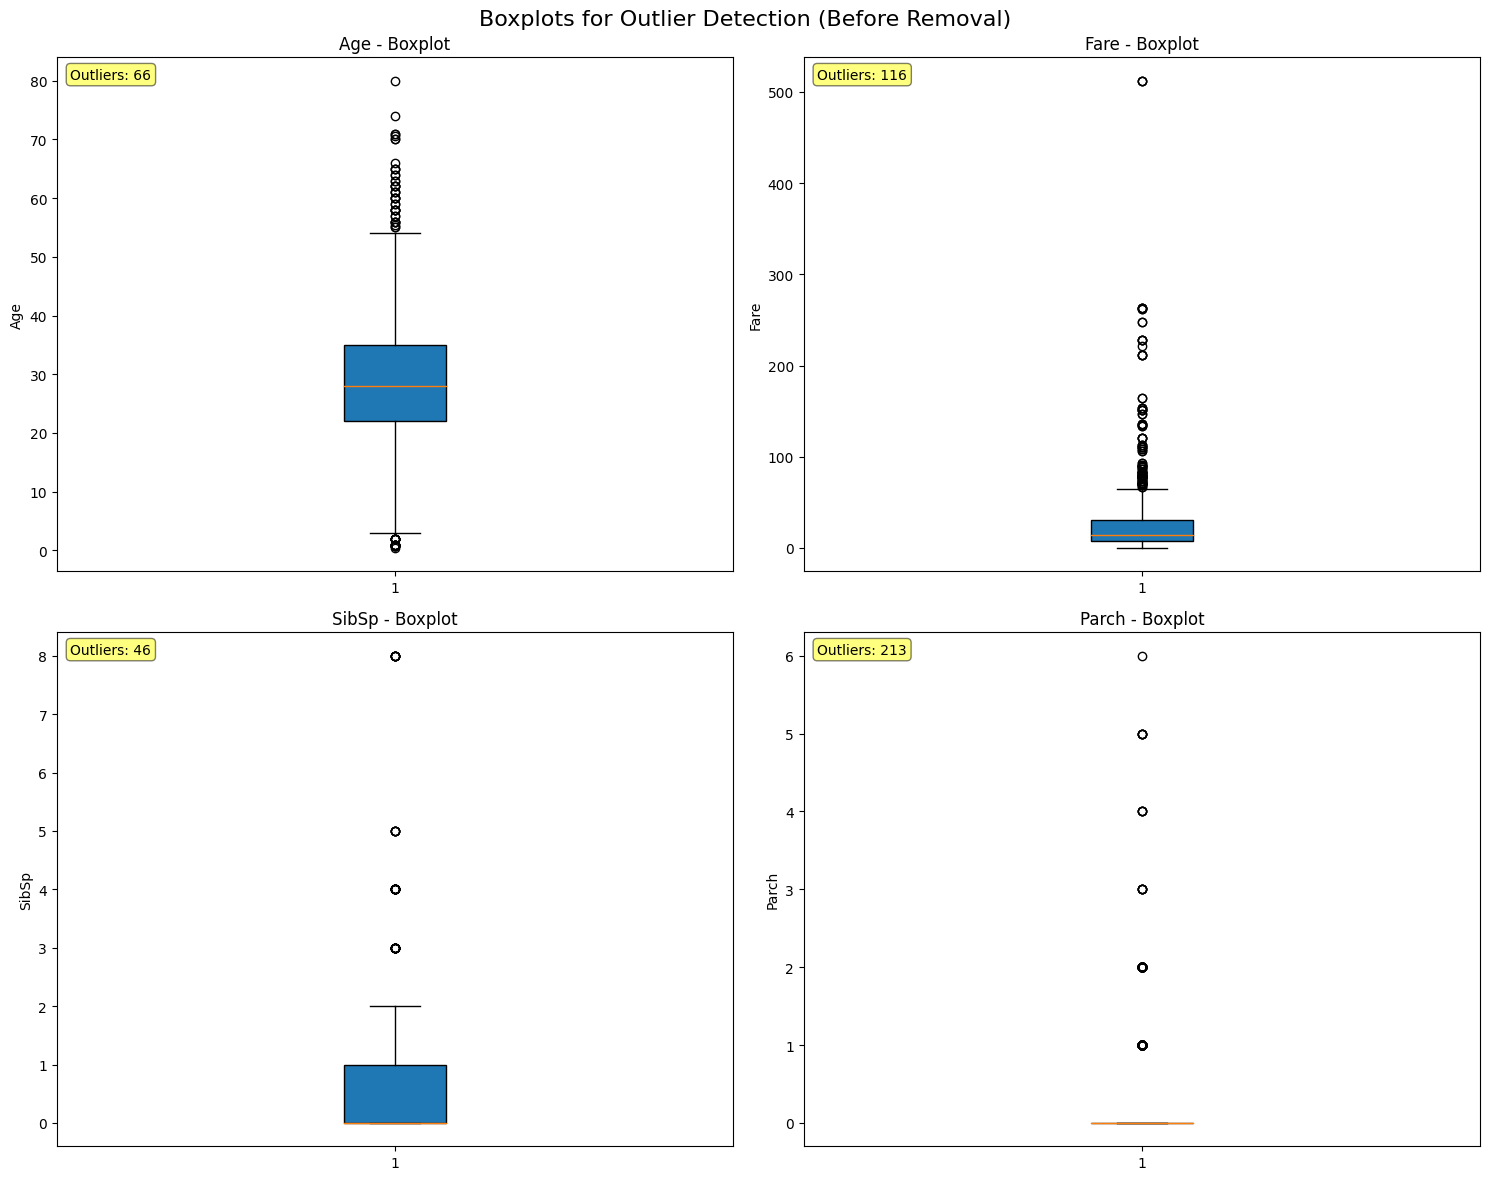

Outlier Analysis:
----------------------------------------
Age:
  Outliers found: 66
  Lower bound: 2.50
  Upper bound: 54.50
  Sample outlier values: [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5]

Fare:
  Outliers found: 116
  Lower bound: -26.72
  Upper bound: 65.63
  Sample outlier values: [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875]

SibSp:
  Outliers found: 46
  Lower bound: -1.50
  Upper bound: 2.50
  Sample outlier values: [3, 4, 3, 3, 4, 5, 3, 4, 5, 3]

Parch:
  Outliers found: 213
  Lower bound: 0.00
  Upper bound: 0.00
  Sample outlier values: [1, 2, 1, 5, 1, 1, 5, 2, 2, 1]

Total outlier data points before removal: 441
Rows before outlier removal: 891
Rows after outlier removal: 577
Rows removed: 314 (35.2%)


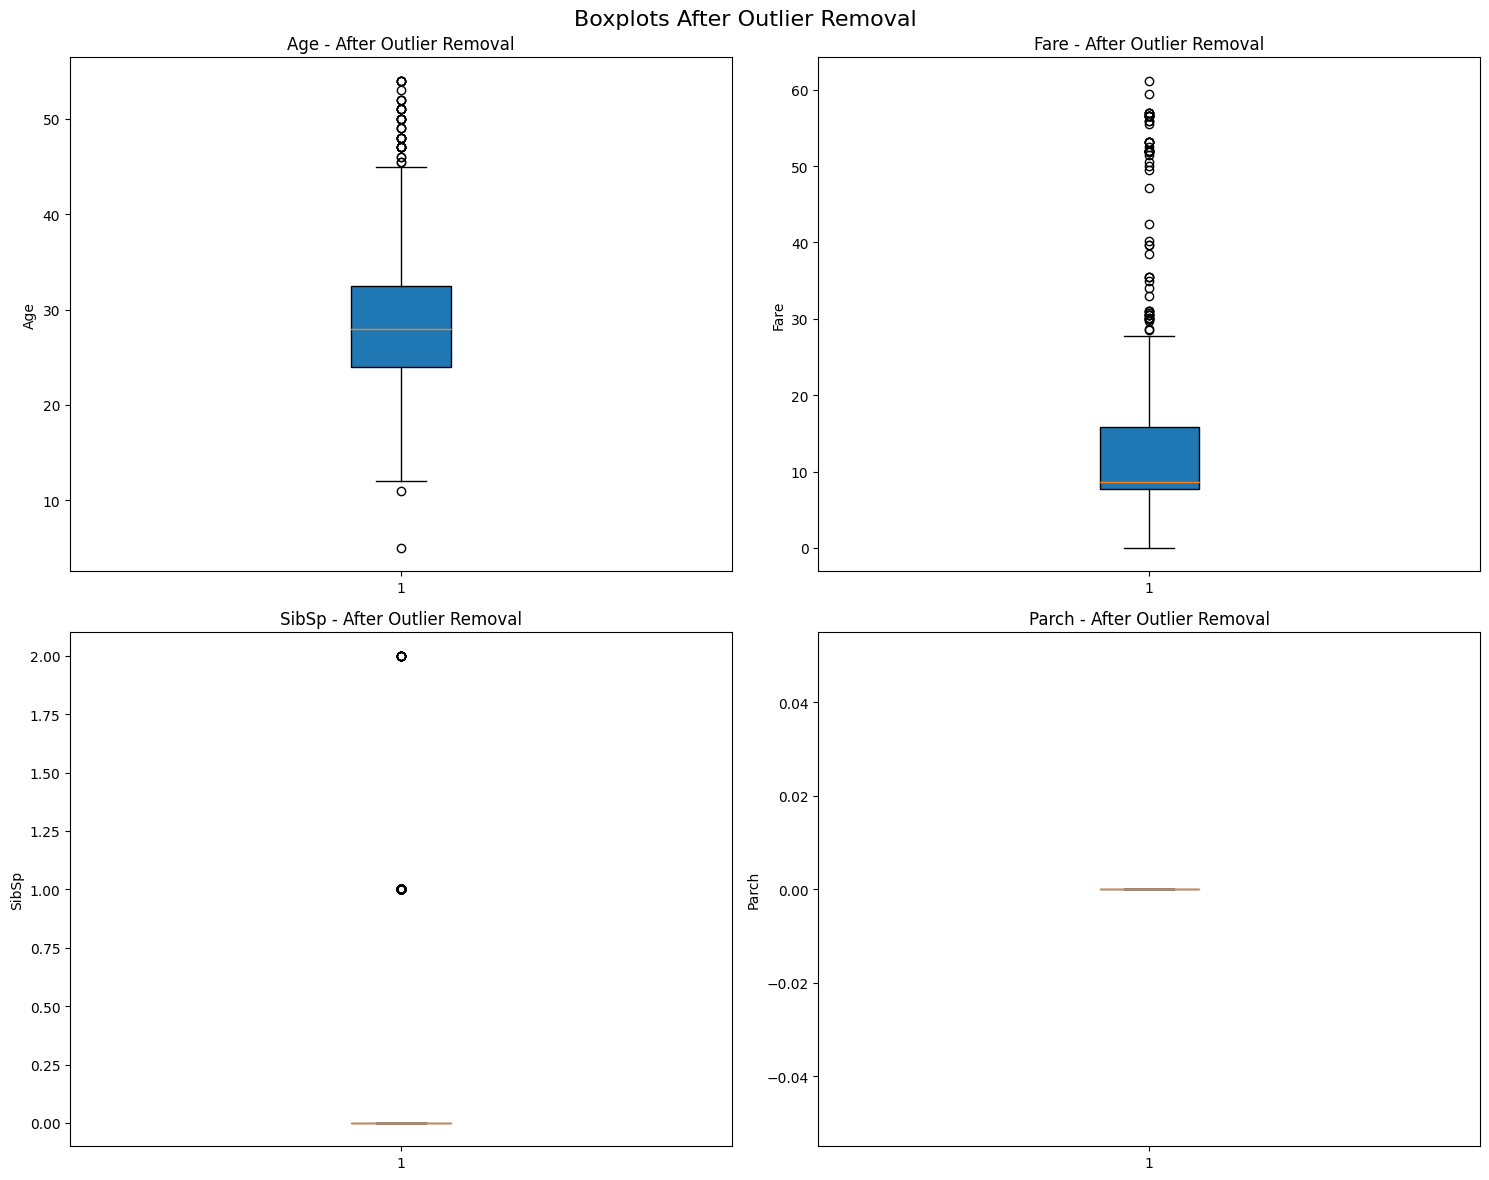


STEP 4: NORMALIZING/STANDARDIZING FEATURES
Numerical columns to normalize: ['Age', 'Fare', 'SibSp', 'Parch']

Normalization Results:
----------------------------------------
Age:
  Original - Mean: 29.30, Std: 8.55
  Original - Min: 5.00, Max: 54.00
  Normalized - Mean: 0.00, Std: 1.00
  Normalized - Min: -2.84, Max: 2.89

Fare:
  Original - Mean: 14.93, Std: 12.61
  Original - Min: 0.00, Max: 61.17
  Normalized - Mean: 0.00, Std: 1.00
  Normalized - Min: -1.19, Max: 3.67

SibSp:
  Original - Mean: 0.20, Std: 0.45
  Original - Min: 0.00, Max: 2.00
  Normalized - Mean: -0.00, Std: 1.00
  Normalized - Min: -0.45, Max: 4.05

Parch:
  Original - Mean: 0.00, Std: 0.00
  Original - Min: 0.00, Max: 0.00
  Normalized - Mean: 0.00, Std: 0.00
  Normalized - Min: 0.00, Max: 0.00


PREPROCESSING COMPLETED
Final dataset shape: (577, 23)
Final columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_Missing', 'Sex_Encoded',

In [10]:
# Usage example:
if __name__ == "__main__":
    # Replace with your file path
    file_path = "/kaggle/input/elevate-lab-task-1/Titanic-Dataset.csv"
    
    # Run the complete preprocessing pipeline
    processed_df, scaler = preprocess_titanic_data(file_path)
    
    # Save the processed dataset
    processed_df.to_csv('titanic_processed.csv', index=False)
    print("\n Processed dataset saved as 'titanic_processed.csv'")
    
    # Optional: Create a summary report
    
    print("\n FINAL SUMMARY REPORT")
    
    
    # Feature summary
    numerical_features = processed_df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = processed_df.select_dtypes(include=['object']).columns.tolist()
    
    print(f"Total features: {len(processed_df.columns)}")
    print(f"Numerical features: {len(numerical_features)}")
    print(f"Categorical features: {len(categorical_features)}")
    print(f"Missing values: {processed_df.isnull().sum().sum()}")
    
    print("\nPreprocessing pipeline completed successfully")